In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
image=cv2.imread("./sift.jpg")
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
sift_algorithm=cv2.SIFT_create()

In [6]:
keypoint_descriptor=sift_algorithm.detect(gray_image,None)

In [9]:
img=cv2.drawKeypoints(gray_image,keypoint_descriptor,image)

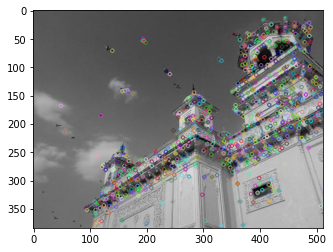

In [12]:
plt.imshow(img)

In [17]:
img_des=cv2.drawKeypoints(gray_image,keypoint_descriptor,image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

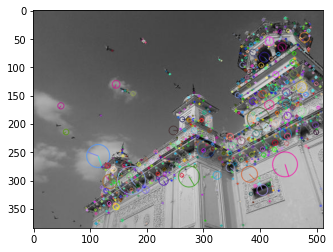

In [19]:
plt.imshow(img_des)

In [21]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray_image,None)

In [28]:
img=cv2.drawKeypoints(gray_image,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# template matching

In [32]:
image=cv2.imread("./img.png")
template=cv2.imread("./tmp.png")

In [33]:
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
template_gray=cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

In [34]:
kp1, des1 = sift.detectAndCompute(image,None)
kp2, des2 = sift.detectAndCompute(template,None)

In [35]:
# BF(brute force)Matcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [45]:
goods=[[m] for m,n in matches if m.distance<0.5*n.distance]

In [48]:
result_image=cv2.drawMatchesKnn(image,kp1,template,kp2,goods,None,flags=2)

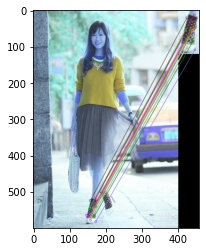

In [49]:
plt.imshow(result_image)

# template with other function

-----------------------IMAGE-----------------------

-----------------------TEMPLATE-----------------------


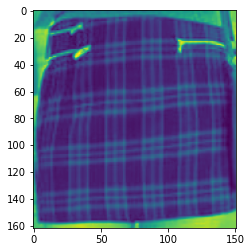

In [3]:

img = cv2.imread('./template_matching.png',0)
img2 = img.copy()
template = cv2.imread('./template_matching_template.png',0)
w, h = template.shape[::-1]

print('-----------------------IMAGE-----------------------')
plt.imshow(img)

print('\n-----------------------TEMPLATE-----------------------')
plt.imshow(template)

# There are total 6 inbuilt methods for template matching
1. TM_CCOEFF

2. TM_CCOEFF_NORMED

3. TM_CCORR

4. TM_CCORR_NORMED

5. TM_SQDIFF

6. TM_SQDIFF_NORMED



In [4]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

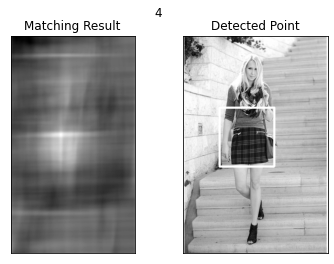

-24604204.0 39518804.0 (11, 1) (100, 200)


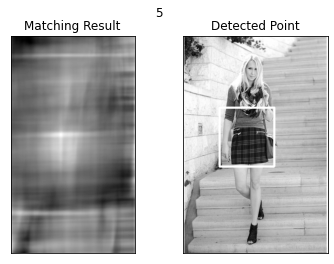

-0.4138614237308502 0.4673759639263153 (37, 12) (100, 200)


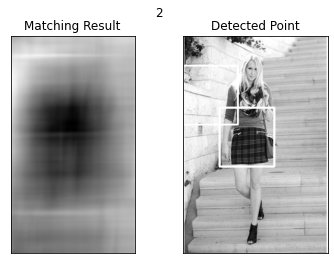

167741408.0 303745504.0 (125, 178) (0, 84)


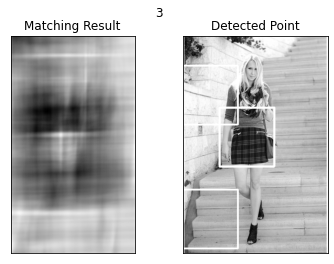

0.6609668135643005 0.8097524642944336 (73, 153) (0, 425)


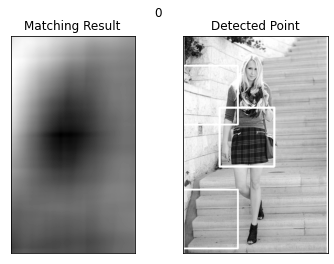

207285696.0 784106752.0 (100, 200) (3, 54)


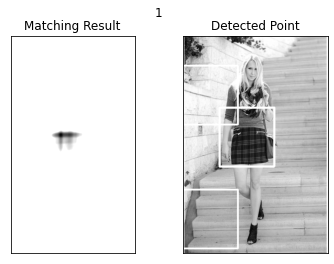

0.8446395397186279 1.0 (100, 200) (0, 0)


In [16]:
for m in methods:
    new_image=img.copy()
    method=eval(m)
    res=cv2.matchTemplate(new_image,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 4)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)

    plt.show()
    
#     p(img)
    
    # PRINT The Coordinates
    print(min_val,max_val,min_loc,max_loc)